In [7]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

try:
    from pdtr import ParseDecisionTreeRules
except ModuleNotFoundError:
    import sys
    
    sys.path.append("../")
    from pdtr import ParseDecisionTreeRules
    
np.random.seed(1)

In [8]:
feature_map = {}
n_samples = 10000
ab = np.array(list('ABCDEFG'))

data = pd.DataFrame({
    'A': np.random.randint(10, size = n_samples),
    'B': ab[np.random.choice(7, n_samples)],
    'C': ab[np.random.choice(2, n_samples)],
    'D': np.random.random(size = n_samples),
    'target': np.random.randint(2, size = n_samples)
})

train, test = train_test_split(data, test_size=0.3, shuffle=data["target"])

In [9]:
pdtr_instance = ParseDecisionTreeRules(target="target", max_iter=8, output="model_report/决策树组合策略挖掘.xlsx")
pdtr_instance.fit(train, lift=0., max_depth=2, max_samples=1., verbose=False, max_features="auto")
all_rules = pdtr_instance.insert_all_rules(test=test)
pdtr_instance.save()

In [10]:
all_rules[0]

,组合策略,命中数,命中率,好样本数,好样本占比,坏样本数,坏样本占比,坏率,样本整体坏率,LIFT值
0,D > 0.999 & A <= 6.5,7,0.0010,7,0.0019,0,0.0000,0.0000,0.4863,0.0000
1,D <= 0.999 & D <= 0.999,6986,0.9980,3589,0.9981,3397,0.9979,0.4863,0.4863,0.9999
2,D <= 0.999 & D > 0.999,6,0.0009,0,0.0000,6,0.0018,1.0000,0.4863,2.0564
3,D > 0.999 & A > 6.5,1,0.0001,0,0.0000,1,0.0003,1.0000,0.4863,2.0564
4,B <= 0.49 & C <= 0.486,2553,0.3647,1345,0.3740,1208,0.3549,0.4732,0.4863,0.9730
5,B <= 0.49 & C > 0.486,2531,0.3616,1290,0.3587,1241,0.3646,0.4903,0.4863,1.0083
6,B > 0.49 & C <= 0.486,966,0.1380,489,0.1360,477,0.1401,0.4938,0.4863,1.0154
7,B > 0.49 & C > 0.486,950,0.1357,472,0.1313,478,0.1404,0.5032,0.4863,1.0347
8,A <= 5.5 & A > 3.5,1451,0.2073,769,0.2138,682,0.2004,0.4700,0.4863,0.9666
9,A > 5.5 & B <= 0.483,1234,0.1763,638,0.1774,596,0.1751,0.4830,0.4863,0.9932


In [11]:
all_rules[1]

,组合策略,命中数,命中率,好样本数,好样本占比,坏样本数,坏样本占比,坏率,样本整体坏率,LIFT值
0,D > 0.999 & A <= 6.5,1,0.0003,0,0.0000,1,0.0007,1.0000,0.4867,2.0548
1,D <= 0.999 & D <= 0.999,2999,0.9997,1540,1.0000,1459,0.9993,0.4865,0.4867,0.9996
2,D <= 0.999 & D > 0.999,0,0.0000,0,0.0000,0,0.0000,0.0000,0.4867,0.0000
3,D > 0.999 & A > 6.5,0,0.0000,0,0.0000,0,0.0000,0.0000,0.4867,0.0000
4,B <= 0.49 & C <= 0.486,1068,0.3560,541,0.3513,527,0.3610,0.4934,0.4867,1.0139
5,B <= 0.49 & C > 0.486,1063,0.3543,549,0.3565,514,0.3521,0.4835,0.4867,0.9936
6,B > 0.49 & C <= 0.486,445,0.1483,228,0.1481,217,0.1486,0.4876,0.4867,1.0020
7,B > 0.49 & C > 0.486,424,0.1413,222,0.1442,202,0.1384,0.4764,0.4867,0.9789
8,A <= 5.5 & A > 3.5,604,0.2013,319,0.2071,285,0.1952,0.4719,0.4867,0.9696
9,A > 5.5 & B <= 0.483,509,0.1697,248,0.1610,261,0.1788,0.5128,0.4867,1.0536


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,A,,"[负无穷 , 5.5)",4221.0000,0.6030,2200.0000,0.6118,2021.0000,0.5937,0.4788,0.0300,0.0005,0.0029,0.9846,0.9846,2200.0000,2021.0000,-0.0181
1,A,,"[5.5 , 7.5)",1424.0000,0.2034,694.0000,0.1930,730.0000,0.2145,0.5126,-0.1054,0.0023,0.0029,1.0542,1.0022,2894.0000,2751.0000,0.0034
2,A,,"[7.5 , 正无穷)",1355.0000,0.1936,702.0000,0.1952,653.0000,0.1918,0.4819,0.0175,0.0001,0.0029,0.9910,1.0000,3596.0000,3404.0000,0.0000
3,A,,缺失值,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,A,,"[负无穷 , 1.0)",287.0000,0.0957,142.0000,0.0922,145.0000,0.0993,0.5052,-0.0743,0.0005,0.0117,1.0381,1.0381,142.0000,145.0000,0.0071
1,A,,"[1.0 , 2.0)",275.0000,0.0917,145.0000,0.0942,130.0000,0.0890,0.4727,0.0558,0.0003,0.0117,0.9714,1.0055,287.0000,275.0000,0.0020
2,A,,"[2.0 , 3.0)",312.0000,0.1040,163.0000,0.1058,149.0000,0.1021,0.4776,0.0364,0.0001,0.0117,0.9813,0.9968,450.0000,424.0000,-0.0018
3,A,,"[3.0 , 4.0)",288.0000,0.0960,141.0000,0.0916,147.0000,0.1007,0.5104,-0.0950,0.0009,0.0117,1.0488,1.0097,591.0000,571.0000,0.0073
4,A,,"[4.0 , 5.0)",283.0000,0.0943,139.0000,0.0903,144.0000,0.0986,0.5088,-0.0887,0.0007,0.0117,1.0455,1.0167,730.0000,715.0000,0.0157
5,A,,"[5.0 , 6.0)",321.0000,0.1070,180.0000,0.1169,141.0000,0.0966,0.4393,0.1908,0.0039,0.0117,0.9026,0.9960,910.0000,856.0000,-0.0046
6,A,,"[6.0 , 7.0)",305.0000,0.1017,141.0000,0.0916,164.0000,0.1123,0.5377,-0.2045,0.0042,0.0117,1.1049,1.0120,1051.0000,1020.0000,0.0162
7,A,,"[7.0 , 8.0)",308.0000,0.1027,163.0000,0.1058,145.0000,0.0993,0.4708,0.0637,0.0004,0.0117,0.9674,1.0062,1214.0000,1165.0000,0.0096
8,A,,"[8.0 , 9.0)",306.0000,0.1020,163.0000,0.1058,143.0000,0.0979,0.4673,0.0775,0.0006,0.0117,0.9602,1.0010,1377.0000,1308.0000,0.0017
9,A,,"[9.0 , 正无穷)",315.0000,0.1050,163.0000,0.1058,152.0000,0.1041,0.4825,0.0165,0.0000,0.0117,0.9915,1.0000,1540.0000,1460.0000,0.0000


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,B,,"D,A",2057.0000,0.2939,1074.0000,0.2987,983.0000,0.2888,0.4779,0.0337,0.0003,0.0010,0.9827,0.9827,1074.0000,983.0000,-0.0099
1,B,,"F,G,C",3027.0000,0.4324,1561.0000,0.4341,1466.0000,0.4307,0.4843,0.0079,0.0000,0.0010,0.9959,0.9906,2635.0000,2449.0000,-0.0133
2,B,,"B,E",1916.0000,0.2737,961.0000,0.2672,955.0000,0.2806,0.4984,-0.0486,0.0006,0.0010,1.0250,1.0000,3596.0000,3404.0000,0.0000
3,B,,缺失值,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,B,,B,435.0000,0.1450,240.0000,0.1558,195.0000,0.1336,0.4483,0.1543,0.0034,0.0107,0.9211,0.9211,240.0000,195.0000,-0.0223
1,B,,G,400.0000,0.1333,219.0000,0.1422,181.0000,0.1240,0.4525,0.1372,0.0025,0.0107,0.9298,0.9253,459.0000,376.0000,-0.0405
2,B,,F,429.0000,0.1430,225.0000,0.1461,204.0000,0.1397,0.4755,0.0446,0.0003,0.0107,0.9771,0.9429,684.0000,580.0000,-0.0469
3,B,,A,423.0000,0.1410,213.0000,0.1383,210.0000,0.1438,0.4965,-0.0392,0.0002,0.0107,1.0201,0.9622,897.0000,790.0000,-0.0414
4,B,,C,432.0000,0.1440,216.0000,0.1403,216.0000,0.1479,0.5000,-0.0534,0.0004,0.0107,1.0274,0.9755,1113.0000,1006.0000,-0.0337
5,B,,D,447.0000,0.1490,217.0000,0.1409,230.0000,0.1575,0.5145,-0.1115,0.0019,0.0107,1.0573,0.9898,1330.0000,1236.0000,-0.0171
6,B,,E,434.0000,0.1447,210.0000,0.1364,224.0000,0.1534,0.5161,-0.1179,0.0020,0.0107,1.0605,1.0000,1540.0000,1460.0000,0.0000
7,B,,缺失值,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,C,,A,3481.0000,0.4973,1762.0000,0.4900,1719.0000,0.5050,0.4938,-0.0302,0.0005,0.0009,1.0155,1.0155,1762.0000,1719.0000,0.0150
1,C,,B,3519.0000,0.5027,1834.0000,0.5100,1685.0000,0.4950,0.4788,0.0299,0.0004,0.0009,0.9847,1.0000,3596.0000,3404.0000,0.0000
2,C,,缺失值,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,C,,A,1487.0000,0.4957,771.0000,0.5006,716.0000,0.4904,0.4815,0.0207,0.0002,0.0004,0.9894,0.9894,771.0000,716.0000,-0.0102
1,C,,B,1513.0000,0.5043,769.0000,0.4994,744.0000,0.5096,0.4917,-0.0203,0.0002,0.0004,1.0104,1.0000,1540.0000,1460.0000,0.0000
2,C,,缺失值,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,D,,"[负无穷 , 0.24885456264019012)",1696.0000,0.2423,870.0000,0.2419,826.0000,0.2427,0.4870,-0.0030,0.0000,0.0026,1.0015,1.0015,870.0000,826.0000,0.0007
1,D,,"[0.24885456264019012 , 0.40155111253261566)",1051.0000,0.1501,509.0000,0.1415,542.0000,0.1592,0.5157,-0.1177,0.0021,0.0026,1.0605,1.0241,1379.0000,1368.0000,0.0184
2,D,,"[0.40155111253261566 , 正无穷)",4253.0000,0.6076,2217.0000,0.6165,2036.0000,0.5981,0.4787,0.0303,0.0006,0.0026,0.9844,1.0000,3596.0000,3404.0000,0.0000
3,D,,缺失值,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


,指标名称,指标含义,分箱,样本总数,样本占比,好样本数,好样本占比,坏样本数,坏样本占比,坏样本率,分档WOE值,分档IV值,指标IV值,LIFT值,累积LIFT值,累积好样本数,累积坏样本数,分档KS值
0,D,,"[负无穷 , 0.21392893250675427)",646.0000,0.2153,334.0000,0.2169,312.0000,0.2137,0.4830,0.0148,0.0000,0.0241,0.9924,0.9924,334.0000,312.0000,-0.0032
1,D,,"[0.21392893250675427 , 0.2435373606603316)",85.0000,0.0283,62.0000,0.0403,23.0000,0.0158,0.2706,0.9382,0.0230,0.0241,0.5560,0.9417,396.0000,335.0000,-0.0277
2,D,,"[0.2435373606603316 , 正无穷)",2269.0000,0.7563,1144.0000,0.7429,1125.0000,0.7705,0.4958,-0.0366,0.0010,0.0241,1.0188,1.0000,1540.0000,1460.0000,0.0000
3,D,,缺失值,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


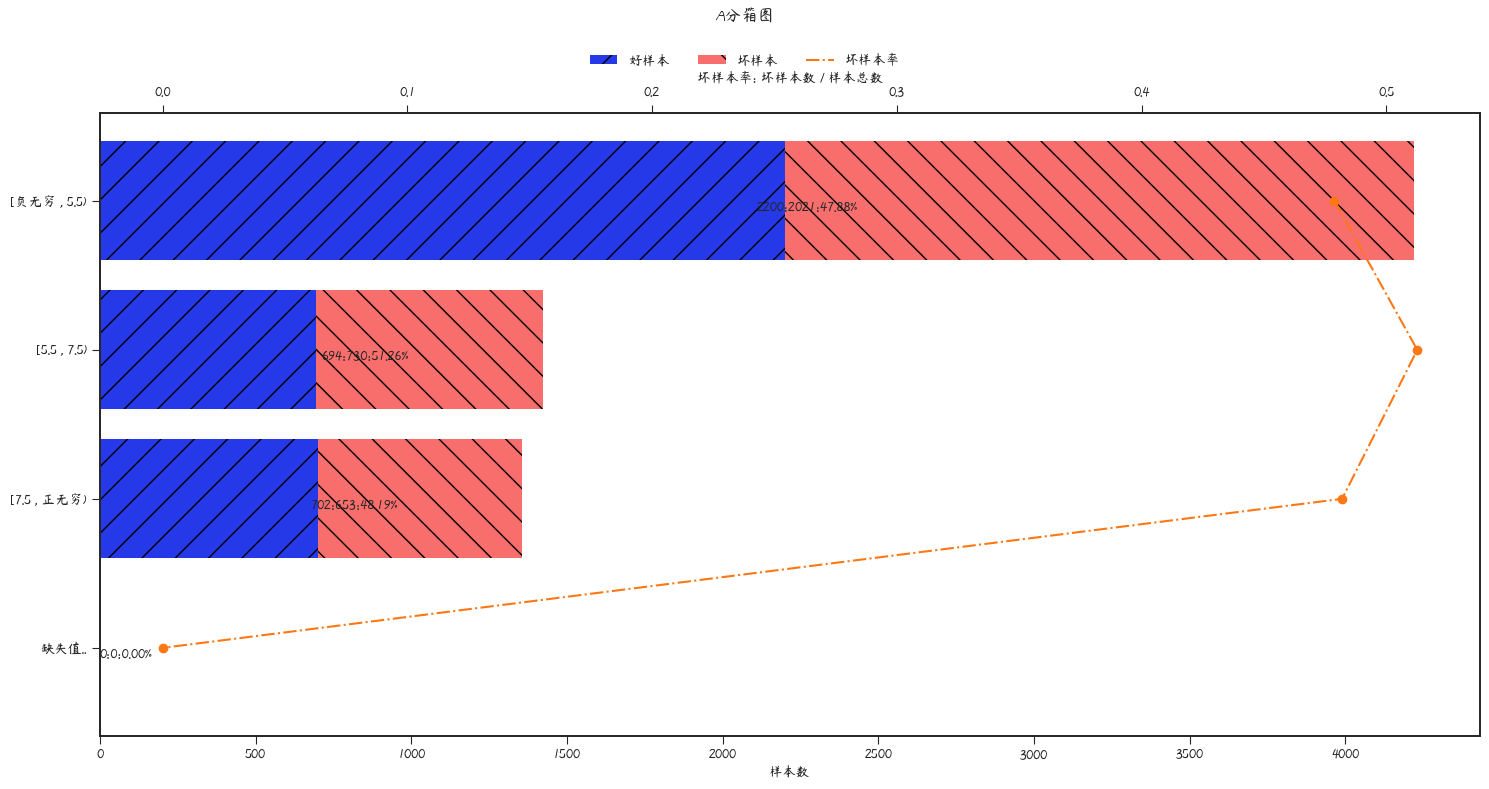

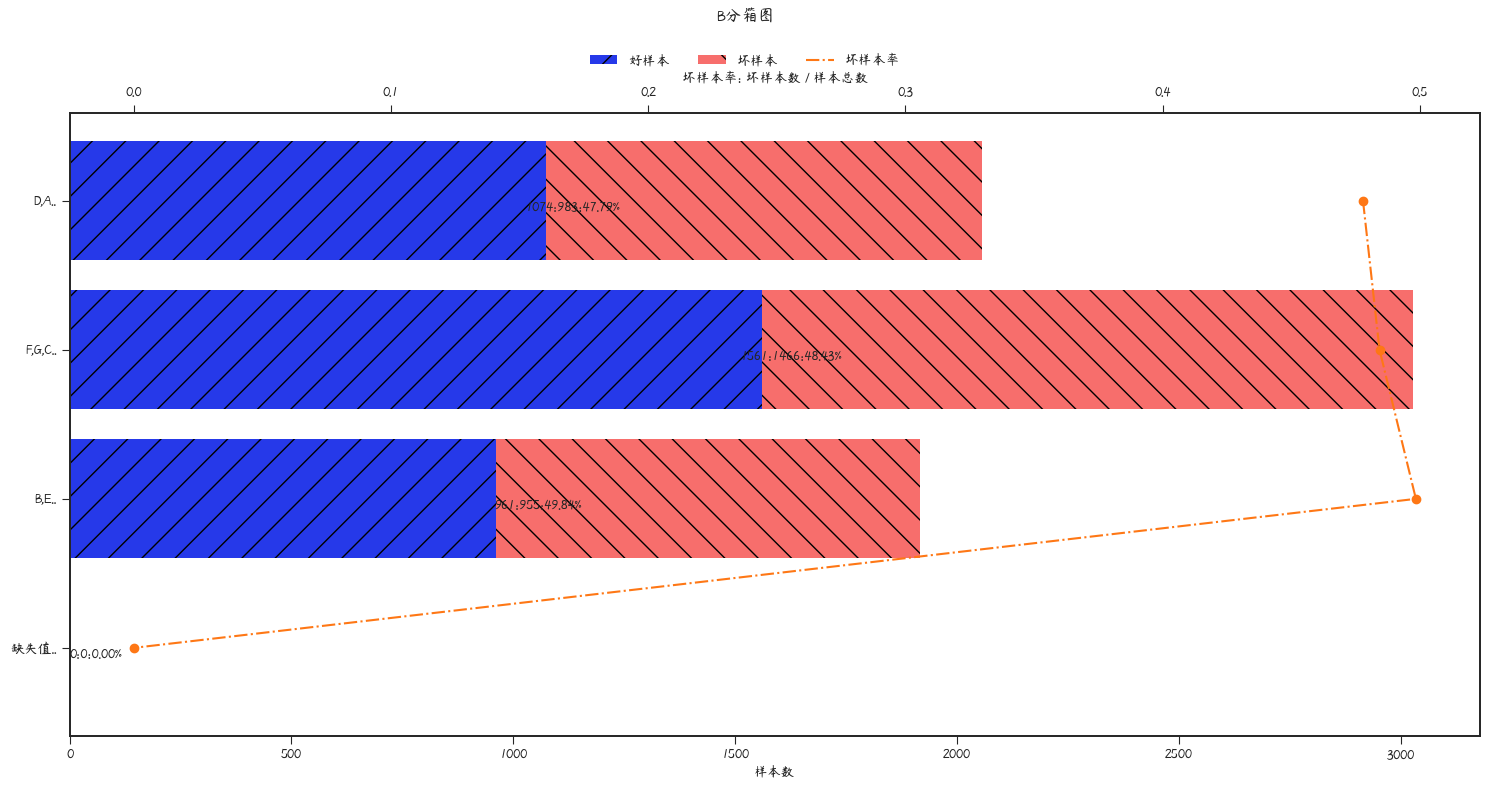

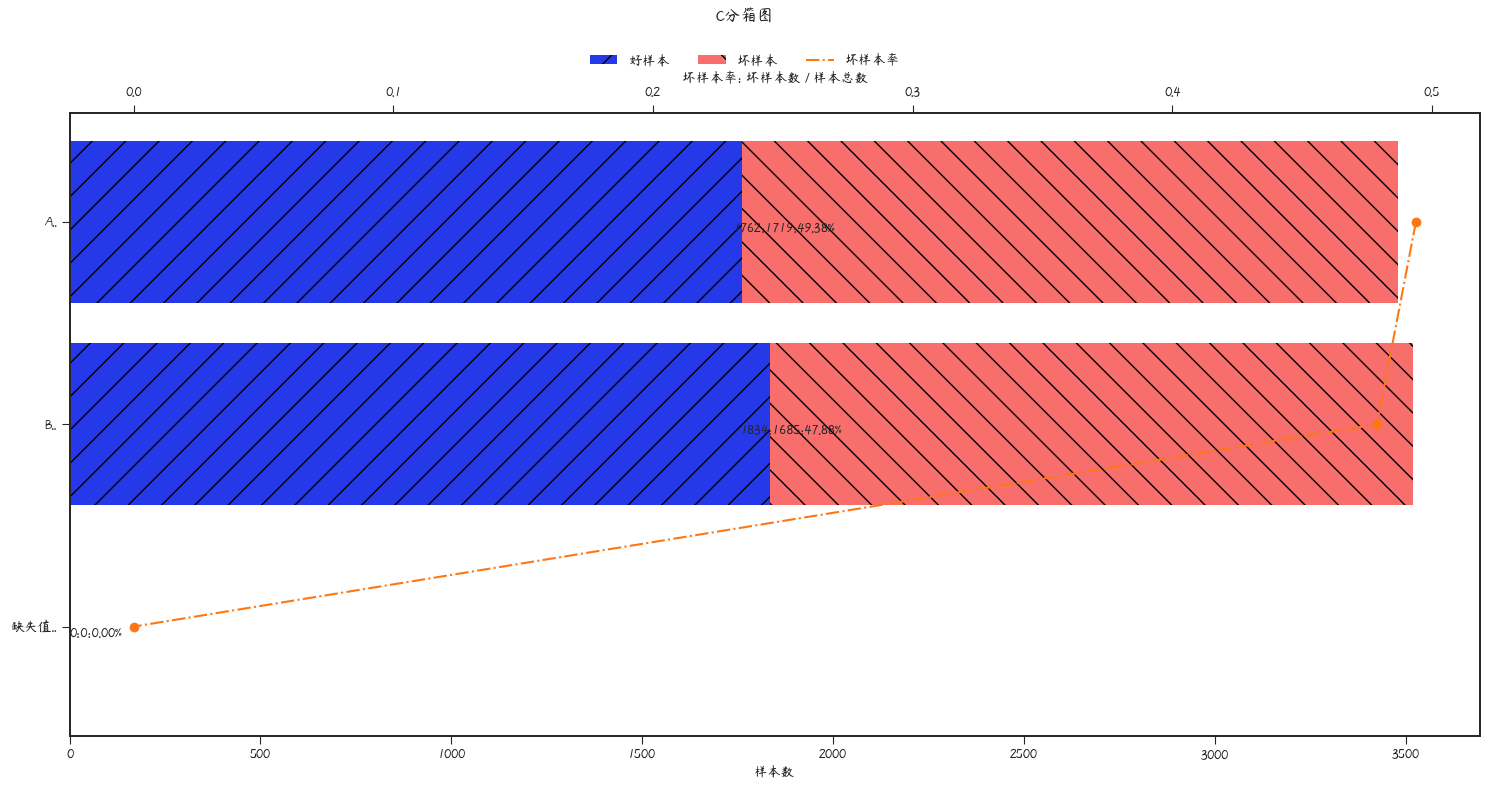

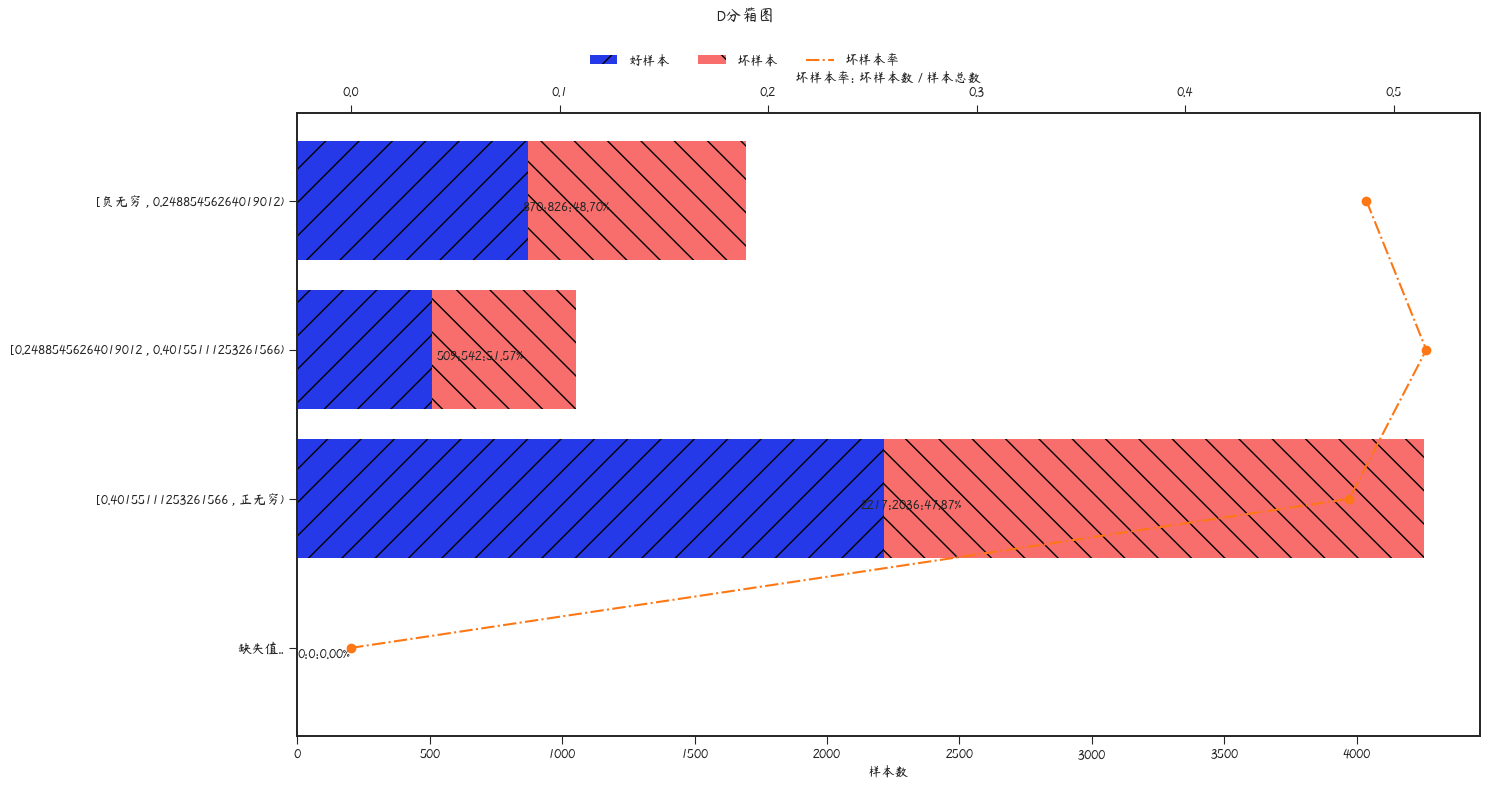

In [19]:
for col in data.columns.drop("target"):
    feature_table = pdtr_instance.feature_bin_stats(train, col, desc="", ks=True, min_bin_size=0.15, max_bin_size=3, method="dt")
    display(feature_table)
    pdtr_instance.bin_plot(feature_table, desc=col, save=f"model_report/bin_plots/bin_vars_{col}.png")
    feature_table = pdtr_instance.feature_bin_stats(test, col, desc="", ks=True, combiner=pdtr_instance.combiner)
    display(feature_table)
    
    # train_feature_table = pdtr_instance.query_feature_rule(data, col, desc="单变量策略挖掘", bin_plot=True, ks=True, min_bin_size=0.15, max_bin_size=3, method="dt")
    # display(train_feature_table)